In [1]:
from sklearn.svm import SVC
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score
from sklearn import neighbors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

In [2]:
yf.pdr_override()

In [14]:
#Df = pdr.get_data_yahoo("SPY", start="2014-01-01",end="2018-01-01")
#Df=pd.read_csv("Nifty.csv")
Df = pdr.get_data_yahoo("BHARTIARTL.NS", start="2012-01-01")
Df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,344.500000,348.899994,342.250000,344.799988,333.021912,1963822
2012-01-03,347.500000,360.450012,345.250000,358.649994,346.398804,2114712
2012-01-04,355.149994,357.000000,345.500000,346.350006,334.518951,2922304
2012-01-05,347.000000,348.799988,342.100006,344.399994,332.635559,2897700
2012-01-06,342.000000,342.000000,328.299988,330.549988,319.258636,7905920


In [15]:
#Df.to_csv("SPY.csv")
Df= Df.dropna()

In [16]:
Df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

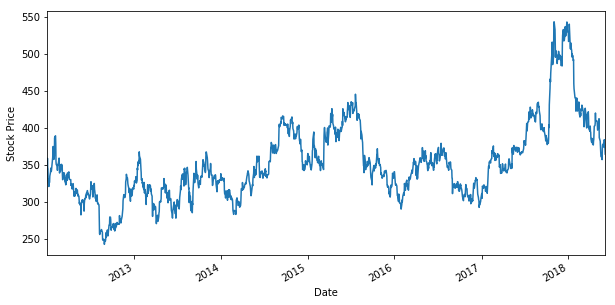

In [17]:
Df.Close.plot(figsize=(10,5))
plt.ylabel("Stock Price")
plt.show()

In [18]:
y = np.where(Df['Close'].shift(-1) > Df['Close'],1,-1)
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low

In [19]:
X=Df[['Open-Close','High-Low']]
split_percentage = 0.8
split = int(split_percentage*len(Df))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [20]:
#X_train,X_test,y_train,y_test=train_test_split(X,y)

In [21]:
clf = SVC().fit(X_train, y_train)
clf2=neighbors.KNeighborsClassifier()
clf2.fit(X_train,y_train)
accuracy_train = accuracy_score(y_train, clf.predict(X_train))
accuracy_test = accuracy_score(y_test, clf.predict(X_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))
accuracy_train = accuracy_score(y_train, clf2.predict(X_train))
accuracy_test = accuracy_score(y_test, clf2.predict(X_test))
print('\nTrain Accuracy kNN:{: .2f}%'.format(accuracy_train*100))
print('Test AccuracykNN:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 64.53%
Test Accuracy: 57.10%

Train Accuracy kNN: 69.27%
Test AccuracykNN: 53.00%


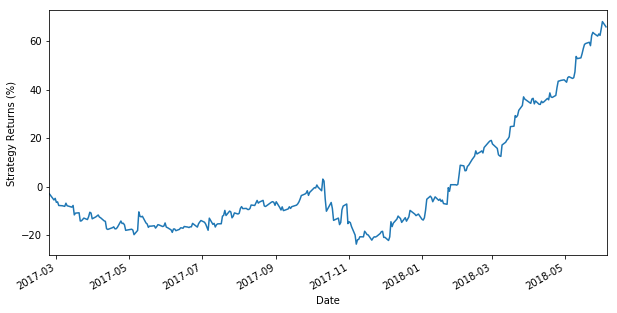

Net Return=  Date
2018-05-30    62.380305
2018-05-31    65.047835
2018-06-01    68.063943
2018-06-04    65.891715
2018-06-05          NaN
Name: Strategy_Return, dtype: float64


In [22]:
Df['Predicted_Signal'] = clf.predict(X)
Df['Return'] = np.log(Df.Close.shift(-1) / Df.Close)*100
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal
Df.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.show()
print("Net Return= ",Df.Strategy_Return.iloc[split:].cumsum().tail())

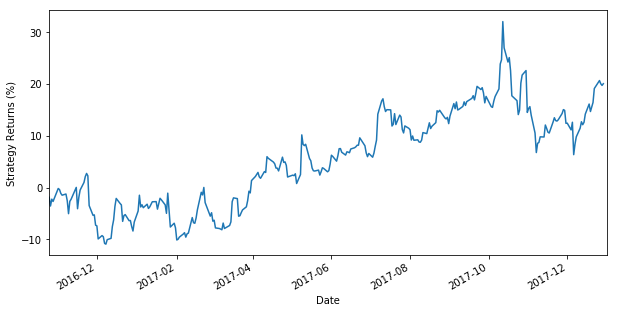

Net Return=  Date
2017-12-26    20.688641
2017-12-27    20.069493
2017-12-28    19.749050
2017-12-29    20.080004
2018-01-01          NaN
Name: Strategy_Return, dtype: float64


In [12]:
Df['Predicted_Signal'] = clf2.predict(X)
Df['Return'] = np.log(Df.Close.shift(-1) / Df.Close)*100
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal
Df.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.show()
print("Net Return= ",Df.Strategy_Return.iloc[split:].cumsum().tail())

In [13]:
import numpy as np
import pandas as pd
import quandl
from matplotlib import pyplot as plt
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression
import math
import pickle

df=quandl.get("NSE/DLINKINDIA")
df=df[['Close']]
#print (df)

forecast_col='Close'

forecast_out=int(math.ceil(0.001*len(df)))
#print(forecast_out)

df['Label']=df[forecast_col].shift(-forecast_out)

X=np.array(df.drop(['Label'],1))
X=preprocessing.scale(X)
X=X[:-forecast_out]
X_lately=X[-forecast_out:]
df.dropna(inplace=True)
y=np.array(df['Label'])

#print(len(X),len(y))

split_percentage = 0.8
split = int(split_percentage*len(Df))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]
clf=LinearRegression()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)

/Users/mananmanwani/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.